<a href="https://colab.research.google.com/github/bill-unitech2021/Work_Log_as_Phd/blob/main/Paper_1_CNN_model_training_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build the model

### load the data

In [1]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
file_path_00 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00.csv'
file_path_30 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30.csv'
file_path_60 = '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CNN train the model

### For filtered_data_no_missing_00

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout,
    concatenate,
    Softmax
)

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_00)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Step 2: Build the CNN model
def build_cnn_model(input_shape, n_classes):
    # Input for accelerometer data
    accelerometer_input = Input(shape=input_shape, name="Accelerometer_Input")

    # Convolutional Layer
    x = Conv1D(filters=196, kernel_size=16, strides=1, activation='relu')(accelerometer_input)
    x = MaxPooling1D(pool_size=4)(x)
    x = Flatten()(x)

    # Fully connected layer with statistical features
    # Add any statistical features here if needed
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=accelerometer_input, outputs=outputs)
    return model

# Define model parameters
input_shape = (n_features, 1)
n_classes = len(label_encoder.classes_)

# Build and compile the model
model = build_cnn_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    verbose=1
)

# Step 4: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 5: Save the model
model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5")
print("Model saved as 'filtered_data_no_missing_00_motion_cnn_model.h5'")


Epoch 1/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7094 - loss: 1.2904 - val_accuracy: 0.9325 - val_loss: 0.3051
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9616 - loss: 0.1713 - val_accuracy: 0.9837 - val_loss: 0.1397
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9882 - loss: 0.0818 - val_accuracy: 0.9842 - val_loss: 0.1304
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9906 - loss: 0.0892 - val_accuracy: 0.9857 - val_loss: 0.1021
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9938 - loss: 0.0445 - val_accuracy: 0.9916 - val_loss: 0.1175
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9843 - loss: 0.1694 - val_accuracy: 0.9931 - val_loss: 0.0588
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9959 - loss: 0.0272 - val_accuracy: 0.9951 - val_loss: 0.0332
Epoch 8/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9963 - loss: 0.0305 - val_accu

Test Loss: 0.21150948107242584
Test Accuracy: 0.9911286234855652
Model saved as 'filtered_data_no_missing_00_motion_cnn_model.h5'


### For filtered_data_no_missing_30

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout,
    concatenate,
    Softmax
)

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_30)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Step 2: Build the CNN model
def build_cnn_model(input_shape, n_classes):
    # Input for accelerometer data
    accelerometer_input = Input(shape=input_shape, name="Accelerometer_Input")

    # Convolutional Layer
    x = Conv1D(filters=196, kernel_size=16, strides=1, activation='relu')(accelerometer_input)
    x = MaxPooling1D(pool_size=4)(x)
    x = Flatten()(x)

    # Fully connected layer with statistical features
    # Add any statistical features here if needed
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=accelerometer_input, outputs=outputs)
    return model

# Define model parameters
input_shape = (n_features, 1)
n_classes = len(label_encoder.classes_)

# Build and compile the model
model = build_cnn_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    verbose=1
)

# Step 4: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 5: Save the model
model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5")
print("Model saved as 'filtered_data_no_missing_30_motion_cnn_model.h5'")


Epoch 1/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7201 - loss: 1.4197 - val_accuracy: 0.9589 - val_loss: 0.2380
Epoch 2/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9714 - loss: 0.2211 - val_accuracy: 0.9910 - val_loss: 0.0745
Epoch 3/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9912 - loss: 0.0608 - val_accuracy: 0.9879 - val_loss: 0.1082
Epoch 4/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9956 - loss: 0.0393 - val_accuracy: 0.9886 - val_loss: 0.0908
Epoch 5/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9931 - loss: 0.0584 - val_accuracy: 0.9876 - val_loss: 0.1565
Epoch 6/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9921 - loss: 0.0868 - val_accuracy: 0.9910 - val_loss: 0.1656
Epoch 7/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9917 - loss: 0.0668 - val_accuracy: 0.9820 - val_loss: 0.1857
Epoch 8/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9857 - loss: 0.0951 - val_acc

Test Loss: 0.11038433760404587
Test Accuracy: 0.996890127658844
Model saved as 'filtered_data_no_missing_30_motion_cnn_model.h5'


### For filtered_data_no_missing_60

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout,
    concatenate,
    Softmax
)

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_60)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Step 2: Build the CNN model
def build_cnn_model(input_shape, n_classes):
    # Input for accelerometer data
    accelerometer_input = Input(shape=input_shape, name="Accelerometer_Input")

    # Convolutional Layer
    x = Conv1D(filters=196, kernel_size=16, strides=1, activation='relu')(accelerometer_input)
    x = MaxPooling1D(pool_size=4)(x)
    x = Flatten()(x)

    # Fully connected layer with statistical features
    # Add any statistical features here if needed
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=accelerometer_input, outputs=outputs)
    return model

# Define model parameters
input_shape = (n_features, 1)
n_classes = len(label_encoder.classes_)

# Build and compile the model
model = build_cnn_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    verbose=1
)

# Step 4: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 5: Save the model
model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5")
print("Model saved as 'filtered_data_no_missing_60_motion_cnn_model.h5'")


Epoch 1/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8038 - loss: 0.9829 - val_accuracy: 0.9907 - val_loss: 0.0897
Epoch 2/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9894 - loss: 0.0742 - val_accuracy: 0.9951 - val_loss: 0.0813
Epoch 3/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9908 - loss: 0.0900 - val_accuracy: 0.9949 - val_loss: 0.0875
Epoch 4/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9955 - loss: 0.0381 - val_accuracy: 0.9959 - val_loss: 0.0420
Epoch 5/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9965 - loss: 0.0269 - val_accuracy: 0.9968 - val_loss: 0.0373
Epoch 6/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9962 - loss: 0.0321 - val_accuracy: 0.9917 - val_loss: 0.0809
Epoch 7/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9972 - loss: 0.0188 - val_accuracy: 0.9968 - val_loss: 0.0222
Epoch 8/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9987 - loss: 0.0055 - val_

Test Loss: 0.07047948986291885
Test Accuracy: 0.9966482520103455
Model saved as 'filtered_data_no_missing_60_motion_cnn_model.h5'


# CNN model modified

## Dataset 00

### train the model /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout
)
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_00)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build the CNN model
def build_cnn_model(input_shape, n_classes):
    accelerometer_input = Input(shape=input_shape, name="Accelerometer_Input")
    x = Conv1D(filters=196, kernel_size=16, strides=1, activation='relu')(accelerometer_input)
    x = MaxPooling1D(pool_size=4)(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=accelerometer_input, outputs=outputs)
    return model

# Define model parameters
input_shape = (n_features, 1)
n_classes = len(label_encoder.classes_)

# Step 3: Train the model and save it
model = build_cnn_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)

model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5")
print("Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5'")



Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.6580 - loss: 1.4553 - val_accuracy: 0.9619 - val_loss: 0.3009
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9712 - loss: 0.1423 - val_accuracy: 0.9829 - val_loss: 0.4602
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9855 - loss: 0.1212 - val_accuracy: 0.9711 - val_loss: 0.1891
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9832 - loss: 0.1033 - val_accuracy: 0.9928 - val_loss: 0.2059
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9831 - loss: 0.1294 - val_accuracy: 0.9888 - val_loss: 0.1393
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9930 - loss: 0.0493 - val_accuracy: 0.9921 - val_loss: 0.1010
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9970 - loss: 0.0288 - val_accuracy: 0.9954 - val_loss: 0.0945
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9987 - loss: 0.0169 - val_accu

Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5'


### model validation /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
      Metric     Score
0  Precision  0.996728
1     Recall  0.996715
2   F1 Score  0.996716
3   Accuracy  0.996715


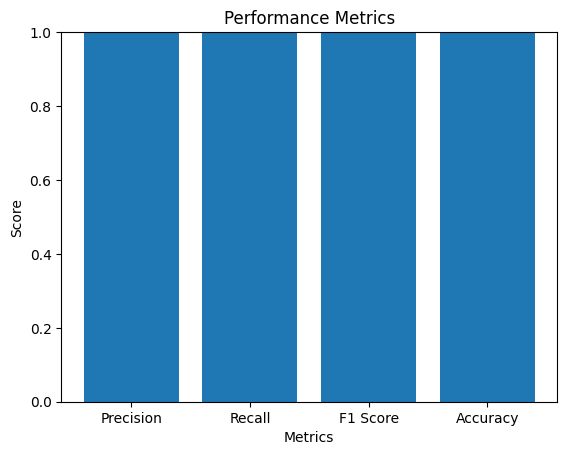

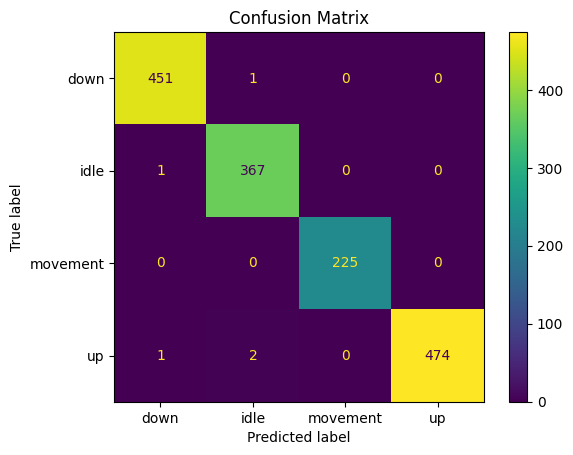

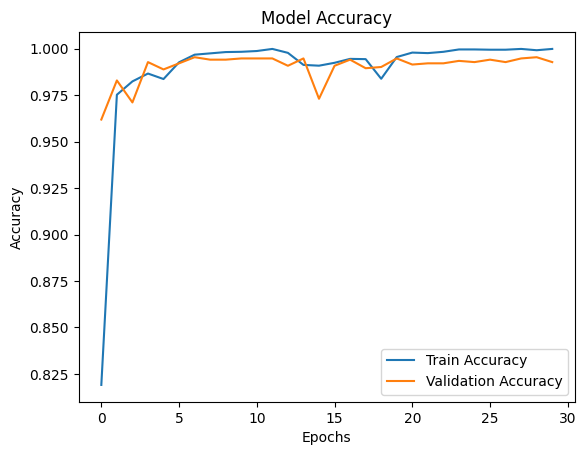

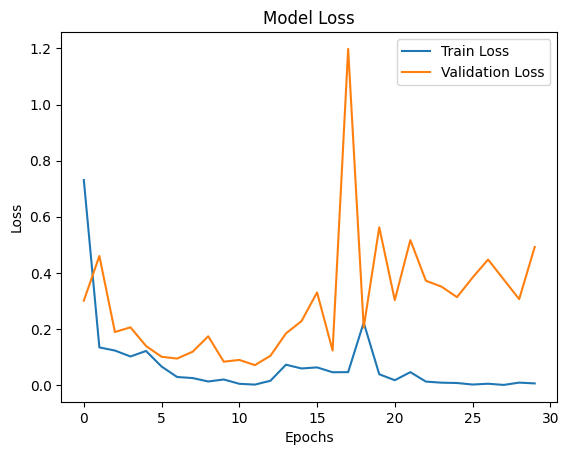

In [5]:

# Step 4: Load the model and evaluate it
loaded_model = load_model("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5")
y_pred_probs = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Performance metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print metrics summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
})
print(metrics_summary)

# Step 5: Visualization
# 1. Plot F1 score, recall, precision, and accuracy
plt.figure()
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# 3. Plot training history: accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Plot training history: loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### overfitting examinantion /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5

Model loaded from /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Performance on Training Set:
Accuracy: 0.9990
Precision: 0.9990
Recall: 0.9990
F1 Score: 0.9990
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Performance on Validation Set:
Accuracy: 0.9928
Precision: 0.9929
Recall: 0.9928
F1 Score: 0.9928
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Performance on Test Set:
Accuracy: 0.9967
Precision: 0.9967
Recall: 0.9967
F1 Score: 0.9967

Metrics Summary:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.999014   0.999018  0.999014  0.999014
1  Validation Set  0.992768   0.992862  0.992768  0.992781
2        Test Set  0.996715   0.996728  0.996715  0.996716


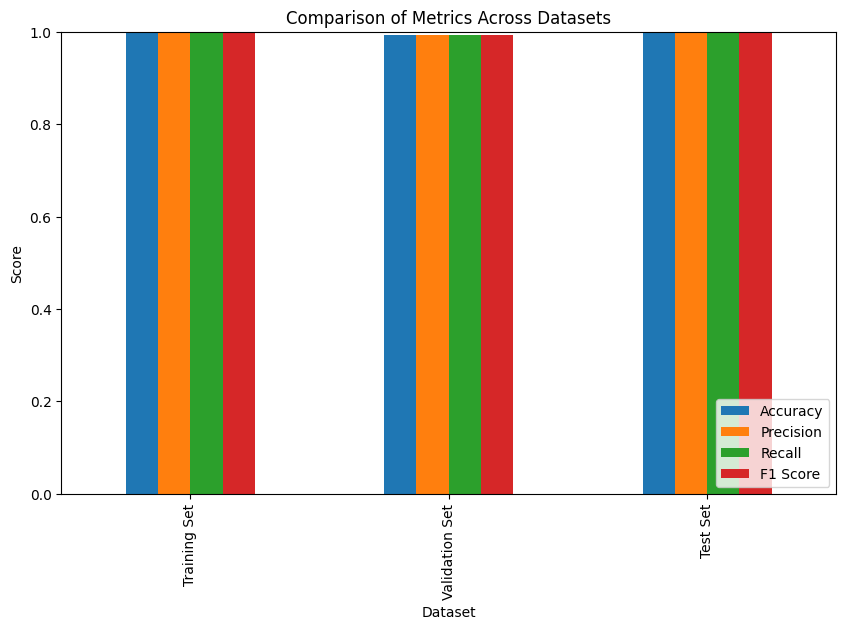

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


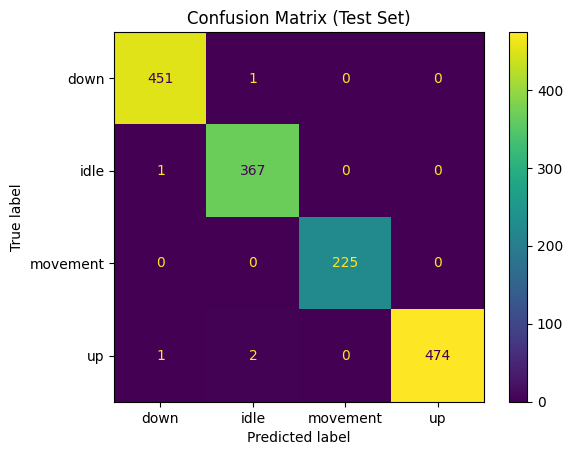

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5"
loaded_model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Step 2: Load and preprocess the data (use the same preprocessing as during training)
data = pd.read_csv(file_path_00)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Evaluate performance on train, validation, and test sets
def evaluate_model(model, X, y, dataset_name):
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')

    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate on train, validation, and test sets
train_metrics = evaluate_model(loaded_model, X_train, y_train, "Training Set")
val_metrics = evaluate_model(loaded_model, X_val, y_val, "Validation Set")
test_metrics = evaluate_model(loaded_model, X_test, y_test, "Test Set")

# Step 4: Summarize metrics in a table
import pandas as pd
metrics_summary = pd.DataFrame([train_metrics, val_metrics, test_metrics])
print("\nMetrics Summary:")
print(metrics_summary)

# Step 5: Plot metrics for comparison
metrics_summary.plot(
    x="Dataset",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10, 6),
    title="Comparison of Metrics Across Datasets"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Step 6: Confusion matrix for test set
y_test_pred_probs = loaded_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_test_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Test Set)")
plt.show()


**conclusion:** The model demonstrates excellent performance across the training, validation, and test sets, with accuracy, precision, recall, and F1 scores all close to 1. The metrics for the validation and test sets are slightly lower than those for the training set but remain very high, indicating strong generalization without significant overfitting. The confusion matrix shows only a few minor misclassifications, primarily between similar categories like "down," "idle," and "up." Overall, the model handles the test set well, with minimal errors and no noticeable overfitting. To further enhance robustness, data augmentation, stronger regularization, and testing on more diverse datasets could be considered.

## Dataset 30

### train the model /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_00_motion_cnn_model.h5

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout
)
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_30)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build the CNN model
def build_cnn_model(input_shape, n_classes):
    accelerometer_input = Input(shape=input_shape, name="Accelerometer_Input")
    x = Conv1D(filters=196, kernel_size=16, strides=1, activation='relu')(accelerometer_input)
    x = MaxPooling1D(pool_size=4)(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=accelerometer_input, outputs=outputs)
    return model

# Define model parameters
input_shape = (n_features, 1)
n_classes = len(label_encoder.classes_)

# Step 3: Train the model and save it
model = build_cnn_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)

model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5")
print("Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5'")



Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.6849 - loss: 1.4949 - val_accuracy: 0.9728 - val_loss: 0.1599
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9722 - loss: 0.1485 - val_accuracy: 0.9903 - val_loss: 0.0945
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9889 - loss: 0.0903 - val_accuracy: 0.9894 - val_loss: 0.1067
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9903 - loss: 0.0650 - val_accuracy: 0.9908 - val_loss: 0.1947
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9887 - loss: 0.0995 - val_accuracy: 0.9820 - val_loss: 0.3855
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9888 - loss: 0.1388 - val_accuracy: 0.9922 - val_loss: 0.0703
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9964 - loss: 0.0275 - val_accuracy: 0.9880 - val_loss: 0.1674
Epoch 8/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9942 - loss: 0.0424 - val_accu

Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5'


### model validation /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
      Metric     Score
0  Precision  0.994026
1     Recall  0.994012
2   F1 Score  0.994014
3   Accuracy  0.994012


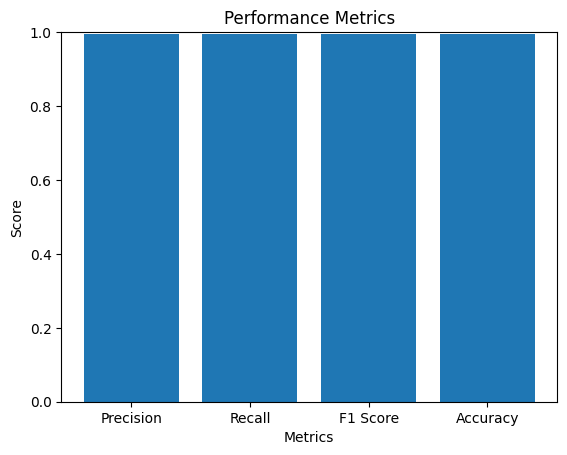

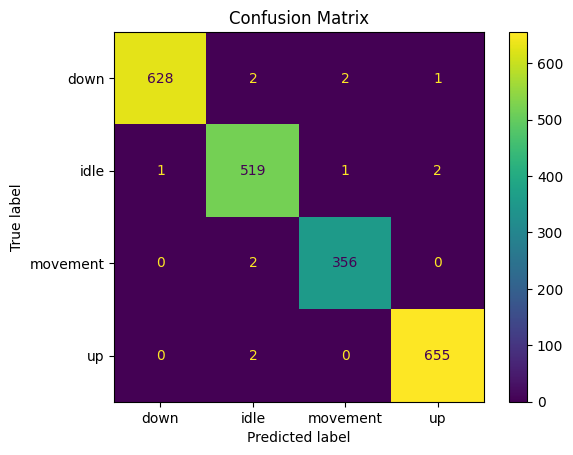

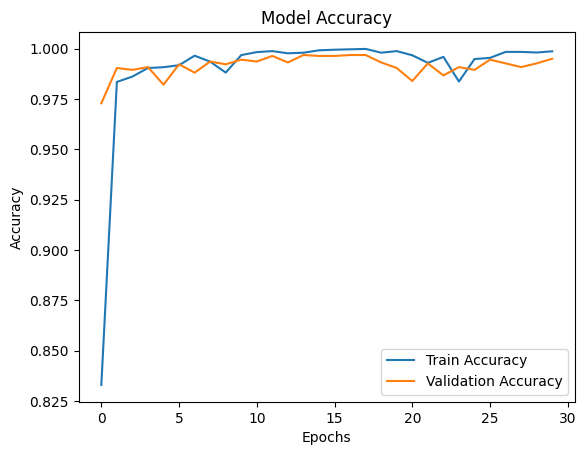

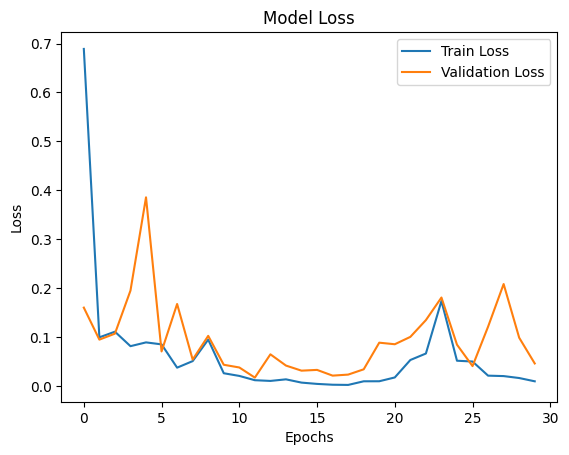

In [8]:

# Step 4: Load the model and evaluate it
loaded_model = load_model("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5")
y_pred_probs = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Performance metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print metrics summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
})
print(metrics_summary)

# Step 5: Visualization
# 1. Plot F1 score, recall, precision, and accuracy
plt.figure()
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# 3. Plot training history: accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Plot training history: loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### overfitting examinantion /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5

Model loaded from /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Performance on Training Set:
Accuracy: 0.9997
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Performance on Validation Set:
Accuracy: 0.9949
Precision: 0.9949
Recall: 0.9949
F1 Score: 0.9949
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Performance on Test Set:
Accuracy: 0.9940
Precision: 0.9940
Recall: 0.9940
F1 Score: 0.9940

Metrics Summary:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.999704   0.999704  0.999704  0.999704
1  Validation Set  0.994931   0.994938  0.994931  0.994931
2        Test Set  0.994012   0.994026  0.994012  0.994014


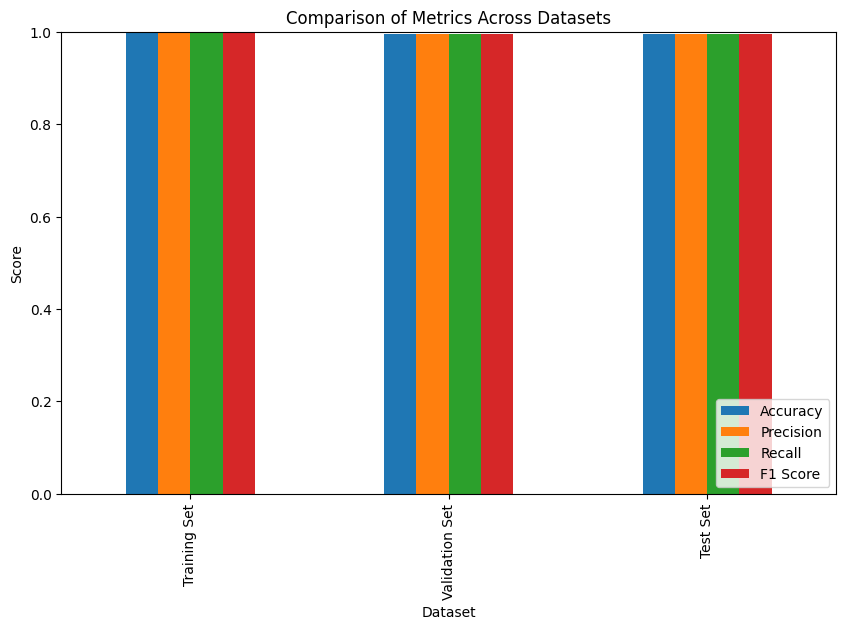

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


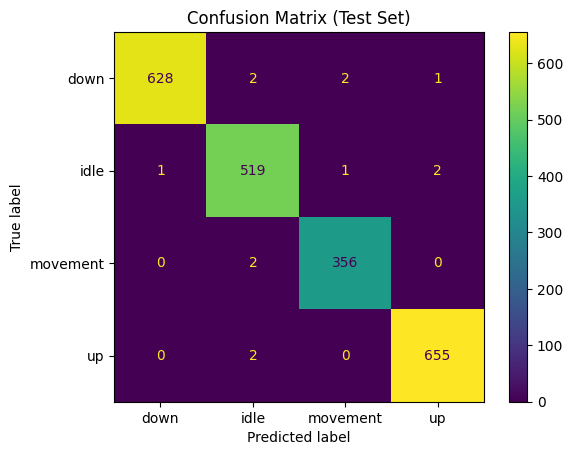

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_30_motion_cnn_model.h5"
loaded_model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Step 2: Load and preprocess the data (use the same preprocessing as during training)
data = pd.read_csv(file_path_30)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Evaluate performance on train, validation, and test sets
def evaluate_model(model, X, y, dataset_name):
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')

    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate on train, validation, and test sets
train_metrics = evaluate_model(loaded_model, X_train, y_train, "Training Set")
val_metrics = evaluate_model(loaded_model, X_val, y_val, "Validation Set")
test_metrics = evaluate_model(loaded_model, X_test, y_test, "Test Set")

# Step 4: Summarize metrics in a table
import pandas as pd
metrics_summary = pd.DataFrame([train_metrics, val_metrics, test_metrics])
print("\nMetrics Summary:")
print(metrics_summary)

# Step 5: Plot metrics for comparison
metrics_summary.plot(
    x="Dataset",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10, 6),
    title="Comparison of Metrics Across Datasets"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Step 6: Confusion matrix for test set
y_test_pred_probs = loaded_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_test_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Test Set)")
plt.show()


## Dataset 60

### train the model /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Dense,
    Dropout
)
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
data = pd.read_csv(file_path_60)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Build the CNN model
def build_cnn_model(input_shape, n_classes):
    accelerometer_input = Input(shape=input_shape, name="Accelerometer_Input")
    x = Conv1D(filters=196, kernel_size=16, strides=1, activation='relu')(accelerometer_input)
    x = MaxPooling1D(pool_size=4)(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.05)(x)
    outputs = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=accelerometer_input, outputs=outputs)
    return model

# Define model parameters
input_shape = (n_features, 1)
n_classes = len(label_encoder.classes_)

# Step 3: Train the model and save it
model = build_cnn_model(input_shape, n_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    verbose=1
)

model.save("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5")
print("Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5'")



Epoch 1/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8060 - loss: 1.1047 - val_accuracy: 0.9869 - val_loss: 0.1500
Epoch 2/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.9883 - loss: 0.0868 - val_accuracy: 0.9800 - val_loss: 0.1328
Epoch 3/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9900 - loss: 0.0766 - val_accuracy: 0.9858 - val_loss: 0.1471
Epoch 4/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9881 - loss: 0.0975 - val_accuracy: 0.9908 - val_loss: 0.1385
Epoch 5/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9912 - loss: 0.0718 - val_accuracy: 0.9961 - val_loss: 0.0528
Epoch 6/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9940 - loss: 0.0690 - val_accuracy: 0.9934 - val_loss: 0.1025
Epoch 7/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9954 - loss: 0.0331 - val_accuracy: 0.9953 - val_loss: 0.0565
Epoch 8/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9956 - loss: 0.0248 - val_ac

Model saved as '/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5'


### model validation /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
      Metric     Score
0  Precision  0.992386
1     Recall  0.992376
2   F1 Score  0.992375
3   Accuracy  0.992376


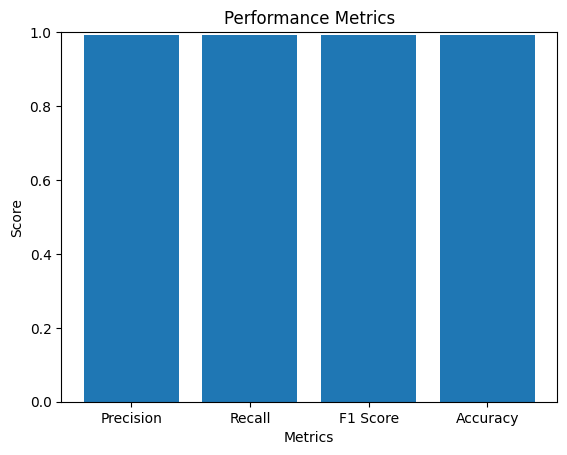

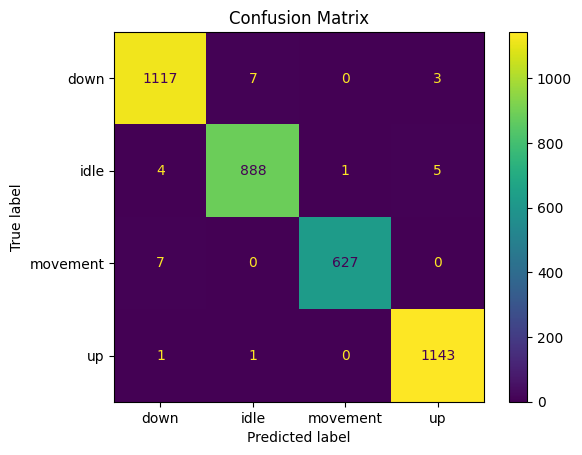

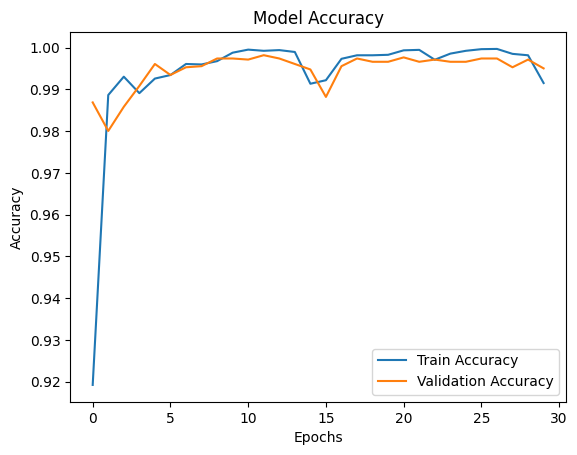

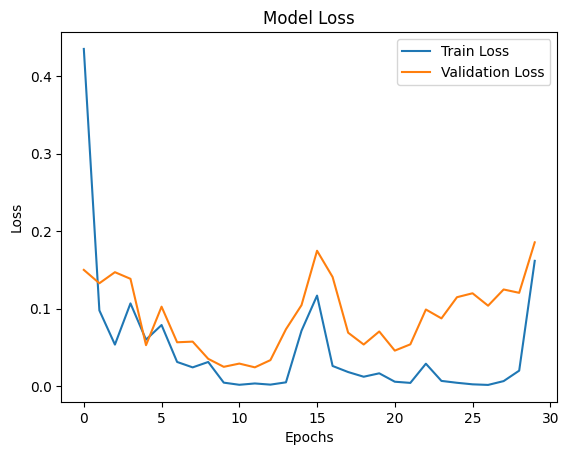

In [12]:

# Step 4: Load the model and evaluate it
loaded_model = load_model("/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5")
y_pred_probs = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Performance metrics
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Print metrics summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
})
print(metrics_summary)

# Step 5: Visualization
# 1. Plot F1 score, recall, precision, and accuracy
plt.figure()
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = [precision, recall, f1, accuracy]
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# 3. Plot training history: accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Plot training history: loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### overfitting examinantion /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5

Model loaded from /content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Performance on Training Set:
Accuracy: 0.9955
Precision: 0.9956
Recall: 0.9955
F1 Score: 0.9955
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Performance on Validation Set:
Accuracy: 0.9950
Precision: 0.9950
Recall: 0.9950
F1 Score: 0.9950
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Performance on Test Set:
Accuracy: 0.9924
Precision: 0.9924
Recall: 0.9924
F1 Score: 0.9924

Metrics Summary:
          Dataset  Accuracy  Precision    Recall  F1 Score
0    Training Set  0.995550   0.995558  0.995550  0.995549
1  Validation Set  0.995005   0.995028  0.995005  0.995000
2        Test Set  0.992376   0.992386  0.992376  0.992375


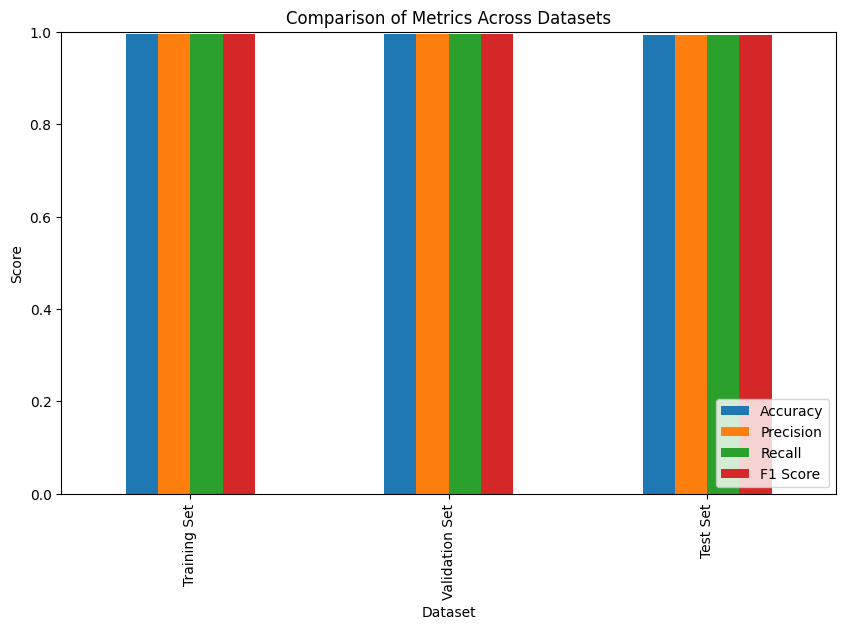

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


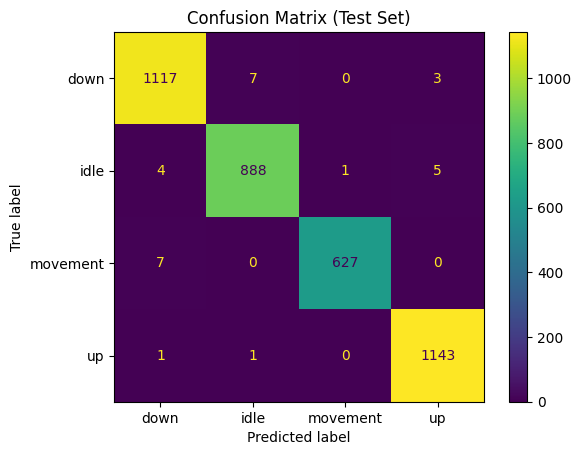

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load the trained model
model_path = "/content/drive/MyDrive/Paper_1_dataset/filtered_data_no_missing_60_motion_cnn_model.h5"
loaded_model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Step 2: Load and preprocess the data (use the same preprocessing as during training)
data = pd.read_csv(file_path_60)

# Drop columns with missing values
data_clean = data.dropna(axis=1)

# Separate features and labels
X = data_clean.drop(columns=['label'])  # Assuming 'label' column exists
y = data_clean['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input (assume each time step is represented by columns)
n_features = X_scaled.shape[1]
X_reshaped = X_scaled.reshape(-1, n_features, 1)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Evaluate performance on train, validation, and test sets
def evaluate_model(model, X, y, dataset_name):
    y_pred_probs = model.predict(X)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y, y_pred_classes)
    precision = precision_score(y, y_pred_classes, average='weighted')
    recall = recall_score(y, y_pred_classes, average='weighted')
    f1 = f1_score(y, y_pred_classes, average='weighted')

    print(f"\nPerformance on {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Evaluate on train, validation, and test sets
train_metrics = evaluate_model(loaded_model, X_train, y_train, "Training Set")
val_metrics = evaluate_model(loaded_model, X_val, y_val, "Validation Set")
test_metrics = evaluate_model(loaded_model, X_test, y_test, "Test Set")

# Step 4: Summarize metrics in a table
import pandas as pd
metrics_summary = pd.DataFrame([train_metrics, val_metrics, test_metrics])
print("\nMetrics Summary:")
print(metrics_summary)

# Step 5: Plot metrics for comparison
metrics_summary.plot(
    x="Dataset",
    y=["Accuracy", "Precision", "Recall", "F1 Score"],
    kind="bar",
    figsize=(10, 6),
    title="Comparison of Metrics Across Datasets"
)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Step 6: Confusion matrix for test set
y_test_pred_probs = loaded_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_test_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Test Set)")
plt.show()
